<a href="https://colab.research.google.com/github/AcerPing/NTUT_FinancialBigData/blob/main/Workshop7_Media.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 在進入文字探勘的世界之前

請先確認以下動作已經完成：
1. 登錄您的 Google 帳號
2. 將本單元的課程資料夾「新增雲端硬碟捷徑（Add shortcut to Drive）」至您的 [Google Drive](https://drive.google.com/drive) 中
3. 按上方工具列的 `「檔案（Files）」` -> `「在雲端硬碟中儲存副本（Make a copy）」`，會跳出一個分頁，請使用該分頁來上課。複製的檔案會儲存在您的 [Google Drive](https://drive.google.com/drive) 的 `「Colab Notebooks」` 資料夾裡

完成後，讓我們往下個儲存格前進。

In [1]:
from google.colab import drive

try:
  drive.mount("/content/drive")
  print("Drive is mounted successfully")
except:
  print("Error: Failed to mount drive")

Mounted at /content/drive
Drive is mounted successfully


# 載入套件
- 如果你需要一個特定的功能，比如說處理文字、處理日期、處理圖像等，在 Python 當中，通常都已經有現成的程式碼可以使用，這就叫做「套件」。

- 套件在安裝後，通常可以直接拿來使用，讓你可以更快速地開發出自己的程式。  

- 使用套件的好處：提高程式碼可讀性、可維護性，讓程式更易於理解和修改。






In [2]:
"""設定檔案路徑、路徑套件"""
import os
import glob
from pathlib import Path 
DOCS_DIR = Path("/content/drive/MyDrive/docs")
UTILS_DIR = Path("/content/drive/MyDrive/docs/utils_doc")

"""設定 Jieba 相關辭典"""
import jieba
import jieba.analyse
jieba.set_dictionary(f"{UTILS_DIR}/dict.txt") # 載入繁中辭典
jieba.load_userdict(f"{UTILS_DIR}/userdict.txt") # 設置使用者辭典 （自行新增的詞語）
jieba.analyse.set_stop_words(f"{UTILS_DIR}/stopdict.txt") # 設置停用詞辭典

"""ignore warning"""
import warnings
warnings.filterwarnings("ignore")

"""資料處理、繪圖套件"""
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # 繪圖套件
from wordcloud import WordCloud # 文字雲套件
from sklearn.feature_extraction.text import TfidfVectorizer 

Building prefix dict from /content/drive/MyDrive/docs/utils_doc/dict.txt ...
DEBUG:jieba:Building prefix dict from /content/drive/MyDrive/docs/utils_doc/dict.txt ...
Dumping model to file cache /tmp/jieba.udbf2fc394b723b6f0e78fc652ba4b7e6.cache
DEBUG:jieba:Dumping model to file cache /tmp/jieba.udbf2fc394b723b6f0e78fc652ba4b7e6.cache
Loading model cost 1.062 seconds.
DEBUG:jieba:Loading model cost 1.062 seconds.
Prefix dict has been built successfully.
DEBUG:jieba:Prefix dict has been built successfully.


# 【基礎】文字探勘實作練習：歌詞資料練習

在【基礎】的實作練習，我們會先使用簡單的歌詞資料集來練習計算「TF-IDF」、繪製「文字雲」。

實作內容：  

- 讀取歌詞檔案   
    從一個 txt 檔中讀取歌詞資料（忘情水.txt），將這些資料儲存到程式中，以便後續分析。

-  計算 TF-IDF    
    使用 Jieba 套件所提供的 TF-IDF 方法計算
  
-  繪製文字雲    
    文字雲可以讓我們快速地了解文本中的關鍵詞，以便進行進一步的分析和處理。

## 步驟一：載入歌詞檔案
在此步驟，我們要載入歌詞的檔案：「忘情水.txt」。

In [3]:
# 設定檔案路徑
SONG_DIR = f"{DOCS_DIR}/忘情水.txt"

# 讀取檔案，變數命名為：lyrics
with open(SONG_DIR, mode="r", encoding="utf-8-sig") as f:
    lyrics = f.read()

# 查看載入的檔案是否正確
print(lyrics)

曾經年少愛追夢 一心只想往前飛
行遍千山和萬水 一路走來不能回
驀然回首情已遠 身不由已在天邊
才明白愛恨情仇 最傷最痛是後悔
如果你不曾心碎 你不會懂得我傷悲
當我眼中有淚 別問我是爲誰
就讓我忘了這一切

啊 給我一杯忘情水 換我一夜不流淚
所有真心真意 任它雨打風吹
付出的愛收不回
給我一杯忘情水 換我一生不傷悲
就算我會喝醉 就算我會心碎
不會看見我流淚

曾經年少愛追夢 一心只想往前飛
行遍千山和萬水 一路走來不能回
驀然回首情已遠 身不由已在天邊
才明白愛恨情仇 最傷最痛是後悔
如果你不曾心碎 你不會懂得我傷悲
當我眼中有淚 別問我是爲誰
就讓我忘了這一切
啊 給我一杯忘情水 換我一夜不流淚
所有真心真意 任它雨打風吹
付出的愛收不回
給我一杯忘情水 換我一生不傷悲
就算我會喝醉 就算我會心碎
不會看見我流淚
啊 給我一杯忘情水 換我一夜不流淚
所有真心真意 任它雨打風吹
付出的愛收不回
給我一杯忘情水 換我一生不傷悲
就算我會喝醉 就算我會心碎
不會看見我流淚
就算我會喝醉 就算我會心碎
不會看見我流淚


## 步驟二：資料清理
做簡單的資料清理：去除換行符號、空白

In [4]:
# 做一些簡單的資料清理：去除換行符號（\n）、空白
lyrics = lyrics.replace("\n", "").replace(" ", "")

# 查看清理後內容
print(lyrics)

曾經年少愛追夢一心只想往前飛行遍千山和萬水一路走來不能回驀然回首情已遠身不由已在天邊才明白愛恨情仇最傷最痛是後悔如果你不曾心碎你不會懂得我傷悲當我眼中有淚別問我是爲誰就讓我忘了這一切啊給我一杯忘情水換我一夜不流淚所有真心真意任它雨打風吹付出的愛收不回給我一杯忘情水換我一生不傷悲就算我會喝醉就算我會心碎不會看見我流淚曾經年少愛追夢一心只想往前飛行遍千山和萬水一路走來不能回驀然回首情已遠身不由已在天邊才明白愛恨情仇最傷最痛是後悔如果你不曾心碎你不會懂得我傷悲當我眼中有淚別問我是爲誰就讓我忘了這一切啊給我一杯忘情水換我一夜不流淚所有真心真意任它雨打風吹付出的愛收不回給我一杯忘情水換我一生不傷悲就算我會喝醉就算我會心碎不會看見我流淚啊給我一杯忘情水換我一夜不流淚所有真心真意任它雨打風吹付出的愛收不回給我一杯忘情水換我一生不傷悲就算我會喝醉就算我會心碎不會看見我流淚就算我會喝醉就算我會心碎不會看見我流淚


## 步驟三：斷詞

### 為什麼要切詞？

> 因為，單詞是語言的最小單位

就像小時候讀課文時，老師都會要求我們背單詞的解釋。而電腦也是一樣，對電腦來說，最簡單的學習方法，也是從單詞來學習。

然而，中文不像英文有空格斷開每個字，中文的「詞」和「詞」之間沒有邊界。所以若要電腦理解一篇中文文章，必須先進行斷詞。


### 範例：
`「我愛文字探勘」` 斷完詞後會變成：`「我」、「愛」、「文字探勘」`

[Jieba 官方文件](https://github.com/fxsjy/jieba)

In [5]:
# 斷詞
words = jieba.lcut(lyrics)
print(words)

['曾經', '年少', '愛', '追夢', '一心', '只想', '往前', '飛行', '遍千山', '和', '萬水', '一路', '走來', '不能', '回', '驀然回首', '情已', '遠身', '不', '由', '已', '在', '天邊', '才', '明白', '愛恨', '情仇', '最傷', '最痛', '是', '後悔', '如果', '你', '不曾', '心碎', '你', '不會', '懂得', '我', '傷悲', '當我眼', '中', '有', '淚別', '問我', '是', '爲', '誰', '就', '讓', '我', '忘了', '這一', '切啊給', '我', '一杯', '忘情水', '換我', '一夜', '不', '流淚', '所有', '真心真意', '任它', '雨', '打', '風吹', '付出', '的', '愛收', '不', '回給', '我', '一杯', '忘情水', '換我', '一生', '不', '傷悲', '就算', '我', '會', '喝醉', '就算', '我', '會', '心碎', '不會', '看見', '我', '流淚', '曾經', '年少', '愛', '追夢', '一心', '只想', '往前', '飛行', '遍千山', '和', '萬水', '一路', '走來', '不能', '回', '驀然回首', '情已', '遠身', '不', '由', '已', '在', '天邊', '才', '明白', '愛恨', '情仇', '最傷', '最痛', '是', '後悔', '如果', '你', '不曾', '心碎', '你', '不會', '懂得', '我', '傷悲', '當我眼', '中', '有', '淚別', '問我', '是', '爲', '誰', '就', '讓', '我', '忘了', '這一', '切啊給', '我', '一杯', '忘情水', '換我', '一夜', '不', '流淚', '所有', '真心真意', '任它', '雨', '打', '風吹', '付出', '的', '愛收', '不', '回給', '我', '一杯', '忘情水', '換我', '一生', '不', '傷悲', '就算', '我', '會', '喝醉', 

In [6]:
# 斷詞並計算 TF-IDF
tfidf_words = jieba.analyse.extract_tags(lyrics, topK=20, withWeight=True)
print(tfidf_words)

[('流淚', 0.7152425001735042), ('忘情水', 0.7128552642051282), ('換我', 0.6130650001487179), ('心碎', 0.5132747360974359), ('傷悲', 0.5108875001239316), ('一杯', 0.3748911078861539), ('真心真意', 0.32825808623846153), ('喝醉', 0.30703236670598294), ('任它', 0.30653250007435895), ('風吹', 0.30653250007435895), ('愛收', 0.30653250007435895), ('回給', 0.30653250007435895), ('追夢', 0.20435500004957263), ('飛行', 0.20435500004957263), ('遍千山', 0.20435500004957263), ('萬水', 0.20435500004957263), ('走來', 0.20435500004957263), ('驀然回首', 0.20435500004957263), ('情已', 0.20435500004957263), ('遠身', 0.20435500004957263)]


## 步驟四：繪製文字雲
> 文字雲：讓讀者不用閱讀完整文章，即可快速認識這篇文章在談論的主要內容  


In [7]:
def word_cloud(
        plot_title: str = "文字雲",
        sentence: str = None, 
        num_words: int = 30,
        **kwags
    ) -> None : 

    # jieba 切詞
    tfidf_words = jieba.analyse.extract_tags(sentence, topK=num_words, withWeight=True)

    # 整理成可繪製文字雲的格式
    words_df = pd.DataFrame(
       tfidf_words,
       columns = ["字詞", "TF-IDF"]
       )
    
    d = dict(zip(words_df["字詞"].to_list(), words_df["TF-IDF"].to_list()))

    # 繪製文字雲
    wc = WordCloud(
        background_color=kwags["set_background_color"], # 設定圖片背景顏色
        collocations=True, # 是否包括兩個詞的搭配
        font_path=f"{UTILS_DIR}/SimHei.ttf", # 若為中文則需引入中文字型(.TTF) 
        max_font_size=48, # 顯示字體的最大值
        colormap=kwags["set_colormap"],  # 設定每個文字的顏色
        )
    
    # 在 colab 中顯示文字雲
    wc.generate_from_frequencies(d)
    plt.title(f"{plot_title}")
    plt.imshow(wc)
    plt.show()


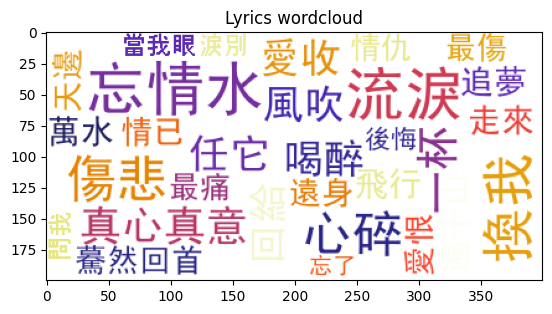

In [8]:
# 繪製歌詞文字雲
word_cloud(
    plot_title="Lyrics wordcloud",
    sentence=lyrics, # 輸入歌詞資料集
    num_words=30, # 設定要顯示在文字雲的字詞數量，整數
    set_background_color="white", # 設定圖片背景顏色，可選：white、black、gray、yellow、red...
    set_colormap="CMRmap", # 設定每個文字的顏色，可選：'Accent', 'Blues', 'CMRmap', 'Oranges' , 'viridis', 'winter'...
    )


# 【進階】文字探勘實作練習：DataStation 新聞媒體文本
在【進階】的實作練習，我們將使用新聞媒體文本來計算「TF-IDF」、繪製「文字雲」。此資料集蒐集了台灣逾 2000 個新聞媒體網站及主流論壇網站於指定時間區間範圍（202005 - 202012）的公開資料。

實作內容：

- 讀取新聞資料集  
   提供已完成前處理過的資料集，分析每個月份的新聞文本。

-  計算 TF-IDF  
   使用 scikit-learn 套件所提供的 TF-IDF 方法計算。  
   scikit-learn 是一個知名的機器學習套件，它提供許多常見的機器學習演算法，如：分類、迴歸、聚類、降維等，也提供資料預處理、特徵提取、模型選擇，以及模型評估等所需的函數模組。
  
-  繪製文字雲  
   讓學生透過實際操作找出各月份新聞文本中的關鍵字，並將其視覺化，以不同的角度分析如何應用從文字雲觀察到的關鍵字與趨勢，制定商業決策。

更多請參考 [資料集來源](https://www.datastation.org.tw/datasets/5)

## 步驟一 ： 載入前處理後檔案

在 **clean_media** 資料夾當中，總共有八個月份（202005 - 202012）、每個月大約有 1000 筆的新聞文本，我們先挑其中一個月的資料集看看吧！  

資料欄位介紹：
- `title`：新聞標題
- `content`：新聞內容
- `text`：合併新聞標題與新聞內容，使用 Jieba 進行斷詞與去除停用詞後的結果

In [9]:
df = pd.read_json(f"{DOCS_DIR}/clean_media/clean_media_202005.json") 
df.head()

,title,content,text
0,《科技》振興券排除電商 TiEA反彈盼政院懸崖勒馬,振興券上路在即，但國發會主委龔明鑫表示，目前規劃方向是以1000元換3000元振興券，振興券...,振興 電商 產業 數位 TiEA 排除 台灣 發展 網路 消費 政府 平台 反彈 政院 懸崖...
1,《日股》金融股領軍 日經早收大漲2％,美中關係正因香港問題進入短兵攻防，然而投資人對經濟快速正常化的樂觀期待壓倒了擔憂。周四日經2...,上漲 類股 指數 汽車 日經 大漲 點或 鋼鐵 類漲 疫情 日股 領軍 早收 關係 短兵 投...
2,不只穿紅衣悼賭王公公被酸 奚夢瑤貼心碎圖也被網嗆爆,澳門賭王何鴻燊26日在家人陪伴下安詳離世，享耆壽98歲，媳婦奚夢瑤才因為身穿暗紅色上衣哀悼賭...,奚夢瑤 賭王 何鴻燊 何猷君 公公 暗紅色 禮貌 貼圖 遭酸 心碎 哀悼 留言 上衣 老公 ...
3,地下樂團「暴君」前主唱供毒害死女友人 賠500萬獲緩刑,地下樂團「暴君」前主唱蕭逸，提供許姓女友人搖頭丸害命，遭依轉讓禁藥罪起訴，由於他承諾賠償50...,蕭逸 許女 女兒 搖頭丸 現場 吸毒 樂團 緩刑 轉讓 起訴 家屬 送醫 當天 自殺 藥物 ...
4,美要求聯合國安理會討論香港問題 陸「斷然反對」,美國和大陸27日在聯合國圍繞香港問題展開交鋒，之前大陸政府反對美國要求聯合國安全理事會就大陸...,美國 大陸 聯合國 安理會 反對 香港 港版 會議 國際 張軍 華盛頓 違反 承諾 立法 討...


接著我們要將 5-12 月的新聞都讀進來，這時可以使用 `glob 模組` 來讀取某個路徑下所有檔案

更多請參考 [glob 官方文件](https://docs.python.org/3/library/glob.html)

In [10]:
glob.glob(f"{DOCS_DIR}/clean_media/*.json") # 讀取clean_media資料夾內所有副檔名為.json的檔案

['/content/drive/MyDrive/docs/clean_media/clean_media_202005.json',
 '/content/drive/MyDrive/docs/clean_media/clean_media_202006.json',
 '/content/drive/MyDrive/docs/clean_media/clean_media_202007.json',
 '/content/drive/MyDrive/docs/clean_media/clean_media_202008.json',
 '/content/drive/MyDrive/docs/clean_media/clean_media_202009.json',
 '/content/drive/MyDrive/docs/clean_media/clean_media_202010.json',
 '/content/drive/MyDrive/docs/clean_media/clean_media_202011.json',
 '/content/drive/MyDrive/docs/clean_media/clean_media_202012.json']

我們的目標是讀取 5-12 月份所有新聞文本，計算新聞中每個字詞的 TF-IDF，並找出在這段期間新聞的關鍵詞與繪製文字雲，我們將資料以列表（list）的形式儲存。 
- 什麼是列表？列表是 Python 常見的儲存資料的結構，每一個元素（element）可能是一個數值、也有可能是一個字串；而每一個元素都有一個自己的索引（index），從 0 開始計數。
![list introduction](https://selflearningsuccess.com/wp-content/uploads/2020/11/%E4%BD%8D%E7%BD%AEindex.png)
- 由於資料集期間為 5-12 月，程式會從 5 月開始讀取，再來是 6 月、7月...，依此類推。 

- `total_news`：為**一維列表**，用於儲存 5-12 月所有新聞，設計結構如下圖所示。
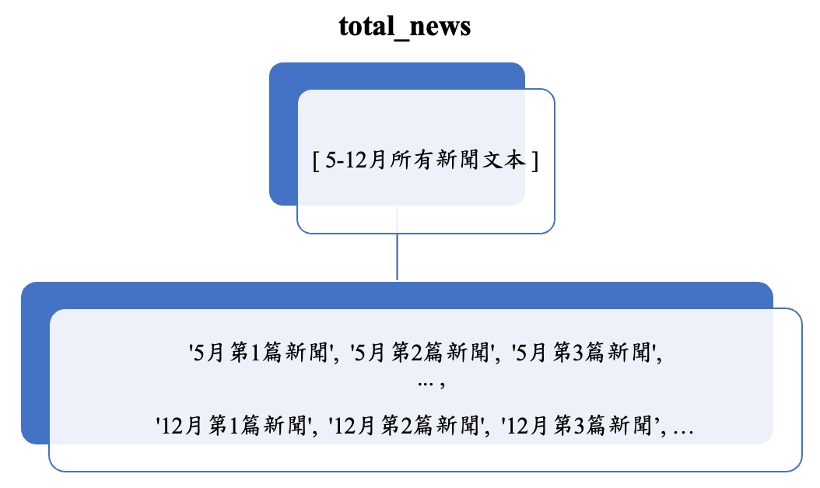

In [11]:
files = glob.glob(f"{DOCS_DIR}/clean_media/*.json") # 讀取clean_media資料夾內所有副檔名為.json的檔案
total_news = []

# 透過for迴圈依序讀取每月新聞文本(斷詞後)到程式中
for file in sorted(files):
    df = pd.read_json(file)
    total_news += df["text"].to_list() # e.g. ["5月第1篇新聞", "5月第2篇新聞", "5月第3篇新聞", ..., "6月第1篇新聞", ..., "12月最後1篇新聞"]

In [12]:
# len()函數可以計算列表內的項目個數，total_news儲存5-12月所有新聞，我們可以使用len()函數計算total_news的長度
print(len(total_news)) # 總共有7954篇新聞 

7954


In [14]:
# 隨機挑選一篇新聞並展示其斷詞結果
total_news[0]

'蕭逸 許女 女兒 搖頭丸 現場 吸毒 樂團 緩刑 轉讓 起訴 家屬 送醫 當天 自殺 藥物 影響 害命 主唱 暴君 提供 地下 供毒 女友人 萬獲 許姓女 遭依 禁藥罪 承諾 賠償 萬元 達成 地院 日判 上訴 檢方 住處 未料 發狂 見狀 報警 並將 沖進 馬桶 蕭逸涉 違反 藥事法 禁藥 審理 期間 供稱 有藥 主動 問他 吃藥 開心 答應 沒想到 承辦 警員 證稱 接獲 報案 服藥 抵達 抽菸 時手 發抖 直覺 帶回 筆錄 蕭逸稱 偵查隊 訊問 蕭男 承認 男則 案發 找不到 吸食器 認罪 無從 犯行 開庭 不當 捲入 學到 慘烈 教訓 會害 許母 個性 不可能 時吃藥 反對 身邊 勸說 痛批 說詞 因蕭逸還 年輕 給予 機會 心裡 過不去 自新 致人 可不可以 不治 移送 毒品 徒刑 施用 害死 案情 友人 死罪 抽搐 清白 道歉 身亡 和解 工作 台北 派出所 知情 死者 喝酒 不安 家人 神情 桌上 得知 法院 不停 男子 全身 第二次 此事 心情 晚上 朋友 真的 接受 指出 只有'

## 步驟二：計算 TF-IDF 與繪製文字雲

scikit-learn 的 TF-IDF 方法計算的結果會輸出一個 TF-IDF 特徵矩陣，顯示**每一個字詞在每一篇新聞文本中的 TF-IDF 分數**。
- 但是，現在有將近 8000 篇新聞文本，我們要如何從眾多新聞中找出重要的關鍵詞呢？有一個簡單的做法 -> **將字詞在每篇新聞文本的 TF-IDF 分數相加計算出總分 (下圖紅字區塊)，TF-IDF 總分越高我們就認為它是比較重要的字詞**
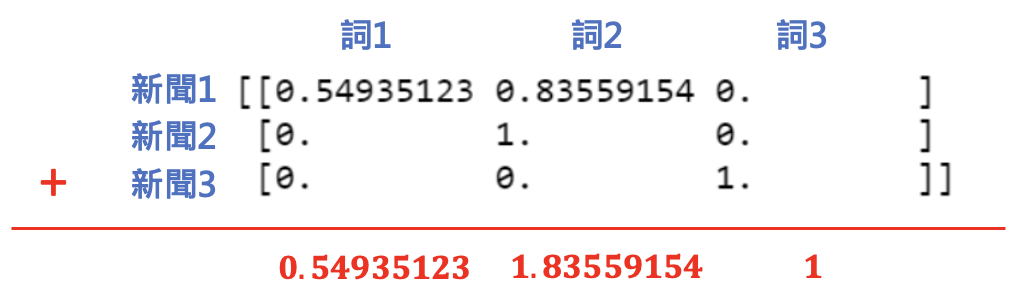

In [15]:
def word_cloud(
        plot_title: str = "文字雲",
        sentence: str = None, 
        num_words: int = 30,
        **kwags
    ) -> None :
    
    # 運用scikit-learn套件所提供的TF-IDF方法
    vectorizer = TfidfVectorizer(smooth_idf=True) # TfidfVectorizer可以把原始文本轉換為TF-IDF特徵矩陣
    tfidf = vectorizer.fit_transform(sentence) # 輸入新聞文本計算字詞的TF-IDF，獲取TF-IDF特徵矩陣

    # 整理成可繪製文字雲的格式
    words_df = pd.DataFrame({
        "字詞": vectorizer.get_feature_names_out(), # 查看所有的字詞
        "TF-IDF": tfidf.toarray().sum(axis=0).tolist() # 將TF-IDF矩陣中每個字詞的TF-IDF分數加總，計算出總分
        })

    top_words = words_df.sort_values(by="TF-IDF", ascending=False)[:num_words] # 挑選TF-IDF總分最高的前N個字詞作為top_words
    d = dict(zip(top_words["字詞"].to_list(), top_words["TF-IDF"].to_list()))

    # 繪製文字雲
    wc = WordCloud(
        background_color=kwags["set_background_color"], # 設定圖片背景顏色
        collocations=True, # 是否包括兩個詞的搭配
        font_path=f"{UTILS_DIR}/SimHei.ttf", # 若為中文則需引入中文字型(.TTF) 
        max_font_size=48, # 顯示字體的最大值
        colormap=kwags["set_colormap"],  # 設定每個文字的顏色
        )
    
    wc.generate_from_frequencies(d)
    plt.title(f'{plot_title}')
    plt.imshow(wc)
    plt.show()

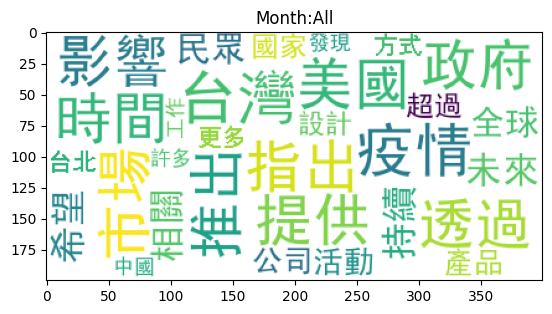

In [16]:
# 繪製總體文字雲
word_cloud(
        plot_title="Month:All", # 設定圖表標題名稱
        sentence=total_news, # 輸入5-12月所有新聞文本
        num_words=30, # 設定要顯示在文字雲的字詞數量，整數
        set_background_color="white", # 設定圖片背景顏色，可選：white、black、gray、yellow、red...
        set_colormap="viridis", # 設定每個文字的顏色，可選：'Accent', 'Blues', 'CMRmap', 'Oranges' , 'viridis', 'winter'...
        )

## 課堂補充：計算每月新聞TF-IDF與繪製文字雲

我們也可以計算**每月**新聞的 TF-IDF 以及繪製文字雲，但是需要改變原本儲存資料的形式，我們將資料以列表（list）的形式儲存。
- 什麼是列表？列表是 Python 常見的儲存資料的結構，每一個元素（element）可能是一個數值、也有可能是一個字串；而每一個元素都有一個自己的索引（index），從 0 開始計數。
![list introduction](https://selflearningsuccess.com/wp-content/uploads/2020/11/%E4%BD%8D%E7%BD%AEindex.png)
- 由於資料集期間為 5-12 月，程式會從 5 月開始讀取，再來是 6 月、7月...，依此類推。

- `month_news`：依據月份儲存新聞，為**二維列表**，其中第 0 維表示第幾個月份、第 1 維表示第幾篇新聞，結構設計如下圖。
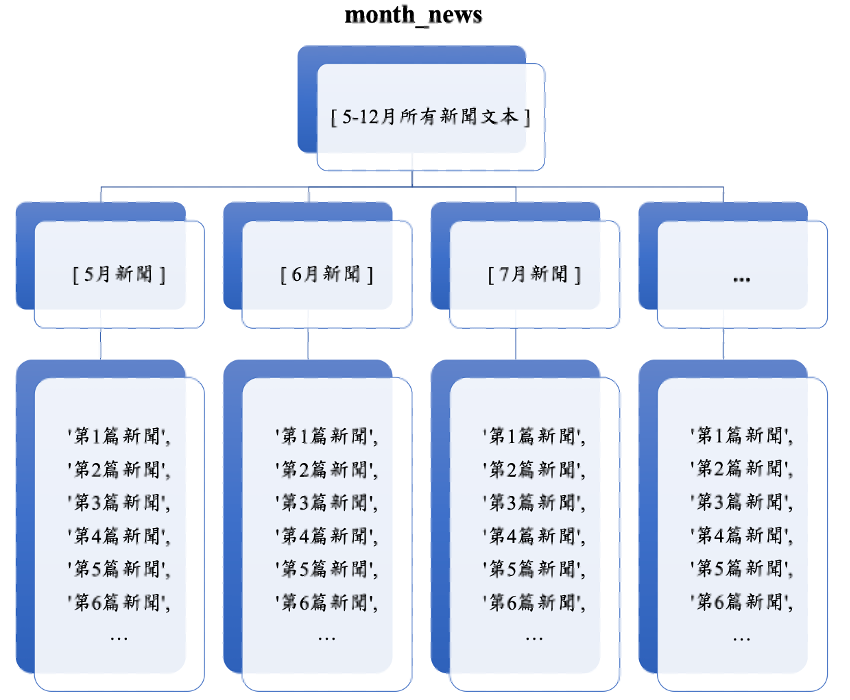

In [17]:
files = glob.glob(f"{DOCS_DIR}/clean_media/*.json") # 讀取clean_media資料夾內所有副檔名為.json的檔案
month_news = []

# 透過for迴圈依序讀取每月新聞文本到程式中
for file in sorted(files):
    df = pd.read_json(file)
    month_news.append(df["text"].to_list()) # e.g. [["5月第1篇新聞", "5月第2篇新聞", "5月第3篇新聞", ...], ["6月第1篇新聞", "6月第2篇新聞", "6月第3篇新聞", ...], ...]

In [18]:
# month_news按照月份儲存新聞，我們可以使用len()函數計算month_news中有多少月份
print(len(month_news)) # 5-12月份總共8個月

8


In [19]:
# month_news[0]代表5月的新聞列表，裡面包含5月的所有新聞，我們可以使用len()函數來觀察5月有幾篇新聞
len(month_news[0])  # 5月有1000篇新聞

1000

In [20]:
month_news[0][0] # 展示5月第1篇新聞斷詞結果

'振興 電商 產業 數位 TiEA 排除 台灣 發展 網路 消費 政府 平台 反彈 政院 懸崖勒馬 呼籲 轉型 紓困 經濟 納稅人 鼓勵 市集 防疫 疫情 政策 在即 國發會 龔明鑫 規劃 元換 排富 年齡 電子 商務 協會 阻礙 違反 原則 錯誤 理事長 陳建弘 不應 嚴峻 期間 衝擊 補助 協助 網路化 餐廳 外送 零售業 階段 過頭 這是 當初 參加 營業 業者 推動 線上 一視同仁 方不 辜負 創辦人 郭書齊 券應 花費 歧視 建議 國內 上應 設籍 總經理 林之晨 哪裡 不該 過多 規則 營運長 曾薰儀 立國 新創 消費性 服務業 單獨 特別 減緩 計畫 推進 升級 口號 本質 難以 國際 經驗 競爭 優勢 科技 主委 美意 似是而非 自相矛盾 大潮 移至 作法 露天 困惑 理事 上路 商家 扮演 待遇 重心 本土 提倡 停留 角色 自行 缺乏 理解 值得 方案 推出 降低 肯定 刺激 方向 希望 指出 原因 提出 生活'

In [21]:
month_news[3][5] # 展示8月第6篇新聞斷詞結果

'Rover Range 配備 Evoque 限定版 New 台灣 問世 升級 休旅 LSUV 絕佳 系統 麂皮 玻璃 效能 黑色 歡慶 週年 NEW RANGE ROVER EVOQUE 始終 頂級 代名詞 歷經 發展 Sport Velar 在內 陣線 改款 獨樹一幟 時尚 風格 席捲 當今 Land Compact 捷豹路虎 導入 50th Limited Edition 備受 好評 P250 Dynamic SE 車型 基礎 搭載 Ingenium 2.0 四缸 渦輪 增壓 具備 249PS 365Nm MHEV 油電 動力 運轉 領先 同級 主動 防護 環景 顯示 ClearSight 視野 電子 後視鏡 列為 標準 專屬 外觀 鋁合金 輪圈 電動 抬頭 顯示器 紫外線 隔絕 擋風 方向盤 頂篷 可調式 車室 氛圍 車窗 價值 消費者 選擇 套件 更以 超值 檀木 全球 暗色 限量 王者 入主 天窗 全景 最受 引擎 革新 汽油 衍生 全新 家族 混合 完整 性能 旗下 配置 提升 今日 代表 提供 世界'

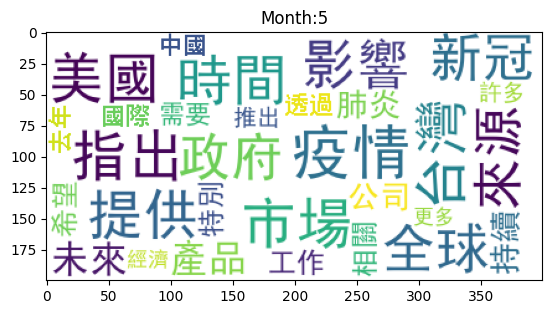

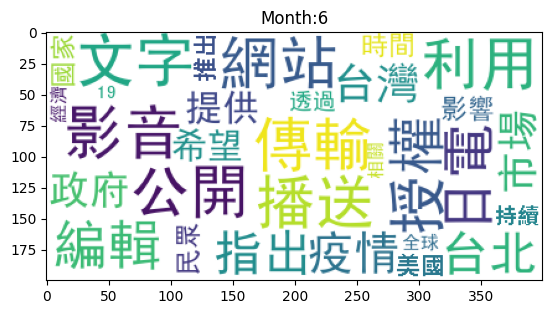

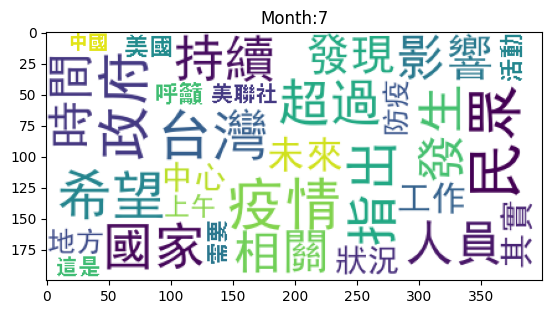

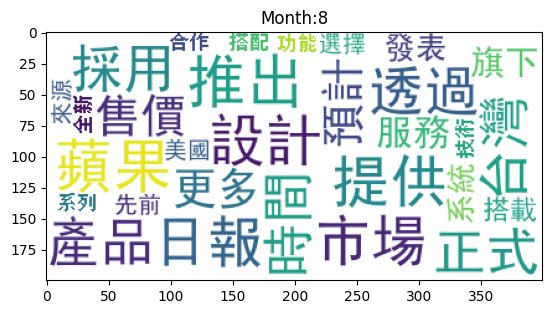

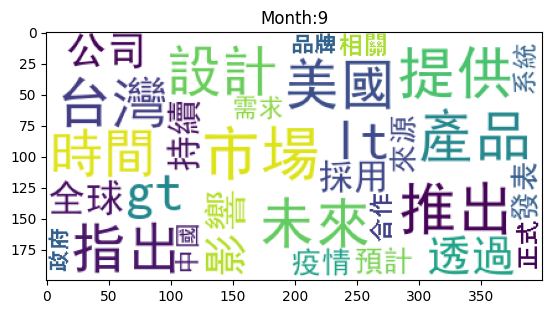

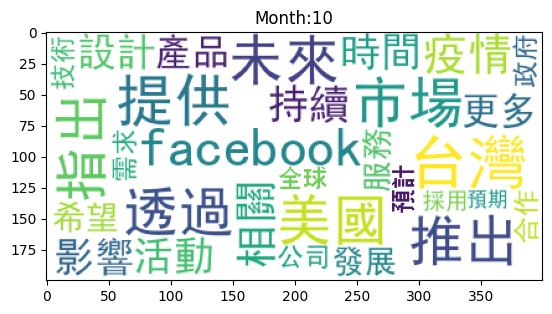

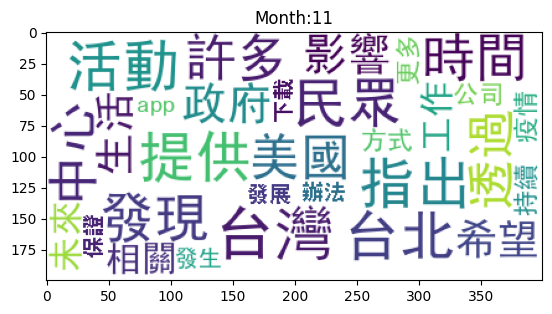

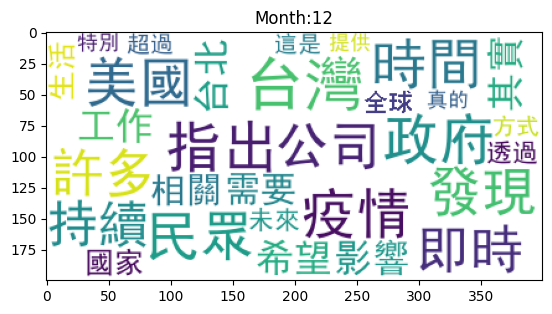

In [22]:
# 繪製5-12月文字雲
for i, news in enumerate(month_news):
    word_cloud(
        plot_title="Month:"+str(i+5), # 設定圖表標題名稱
        sentence=news, # 輸入每月新聞文本
        num_words=30, # 設定要顯示在文字雲的字詞數量，整數
        set_background_color="white", # 設定圖片背景顏色，可選：white、black、gray、yellow、red...
        set_colormap="viridis", # 設定每個文字的顏色，可選：'Accent', 'Blues', 'CMRmap', 'Oranges' , 'viridis', 'winter'...
        )